In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')


In [2]:
df = pd.read_csv("/content/Employe_Performance_dataset.csv")
df.head()


,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,NaN,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Gender             1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Salary             1000 non-null   int64  
 6   Joining Date       1000 non-null   object 
 7   Performance Score  502 non-null    float64
 8   Experience         1000 non-null   int64  
 9   Status             1000 non-null   object 
 10  Location           1000 non-null   object 
 11  Session            1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


,0
ID,0
Name,0
Age,0
Gender,0
Department,0
Salary,0
Joining Date,0
Performance Score,498
Experience,0
Status,0


/tmp/ipython-input-3518571666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Salary', data=df, estimator='mean', palette='viridis')


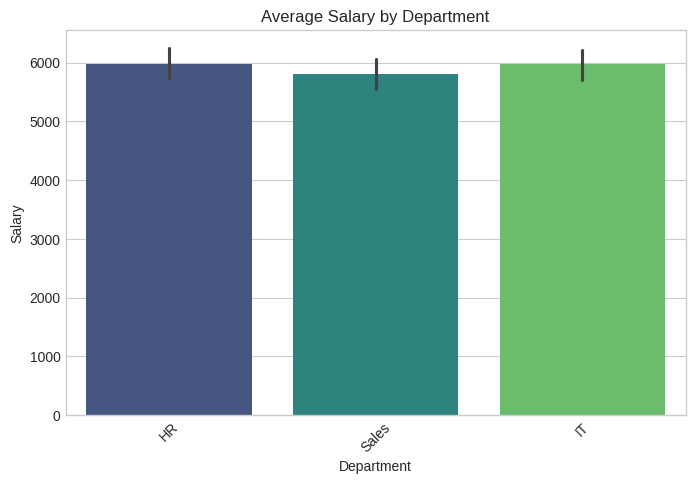

In [4]:
plt.figure(figsize=(8,5))
sns.barplot(x='Department', y='Salary', data=df, estimator='mean', palette='viridis')
plt.title("Average Salary by Department")
plt.xticks(rotation=45)
plt.show()


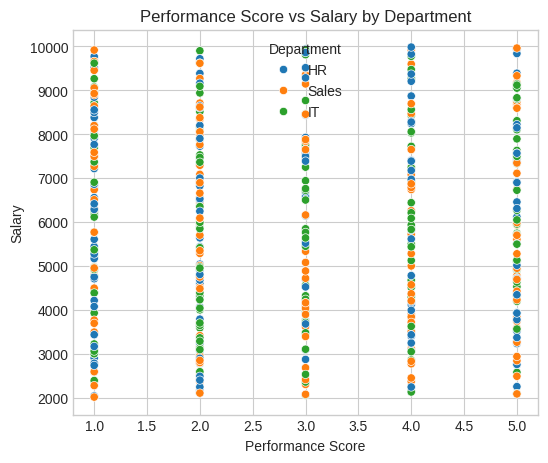

In [5]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Performance Score', y='Salary', hue='Department', data=df)
plt.title("Performance Score vs Salary by Department")
plt.show()


/tmp/ipython-input-1803164375.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Experience', data=df, palette='coolwarm')


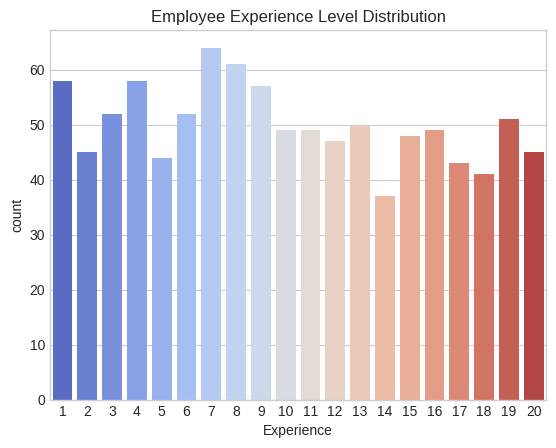

In [7]:
sns.countplot(x='Experience', data=df, palette='coolwarm')
plt.title("Employee Experience Level Distribution")
plt.show()


/tmp/ipython-input-4124307505.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='crest')


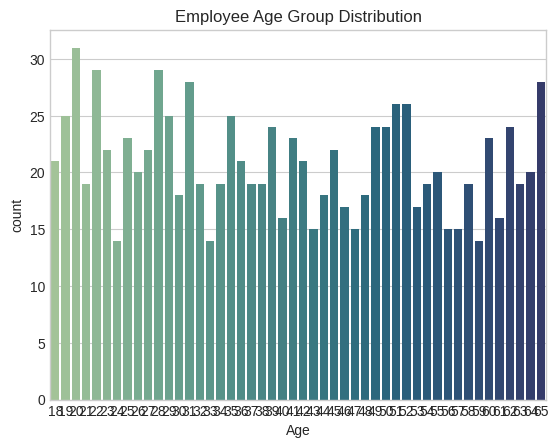

In [9]:
sns.countplot(x='Age', data=df, palette='crest')
plt.title("Employee Age Group Distribution")
plt.show()


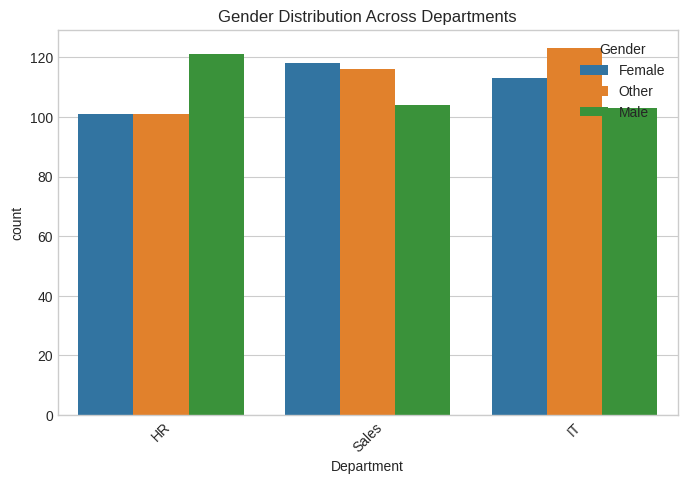

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Gender', data=df)
plt.title("Gender Distribution Across Departments")
plt.xticks(rotation=45)
plt.show()


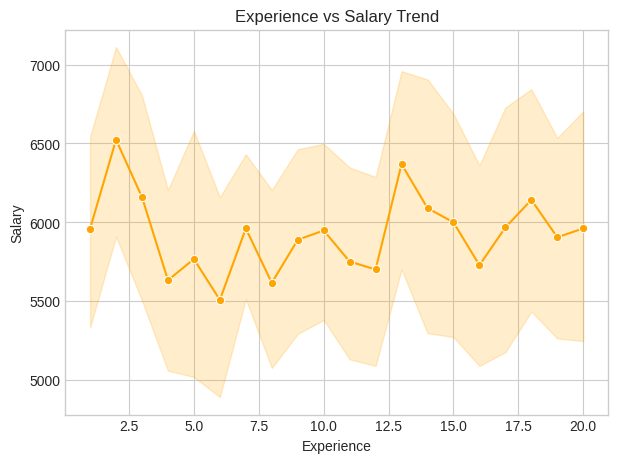

In [12]:
plt.figure(figsize=(7,5))
sns.lineplot(x='Experience', y='Salary', data=df, marker='o', color='orange')
plt.title("Experience vs Salary Trend")
plt.show()


/tmp/ipython-input-3192804730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Name', x='Salary', data=top10, palette='viridis')


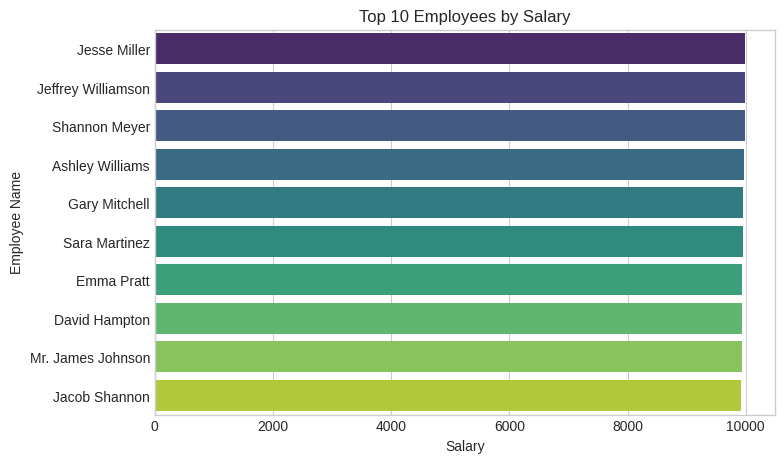

In [13]:
top10 = df.nlargest(10, 'Salary')
plt.figure(figsize=(8,5))
sns.barplot(y='Name', x='Salary', data=top10, palette='viridis')
plt.title("Top 10 Employees by Salary")
plt.xlabel("Salary")
plt.ylabel("Employee Name")
plt.show()


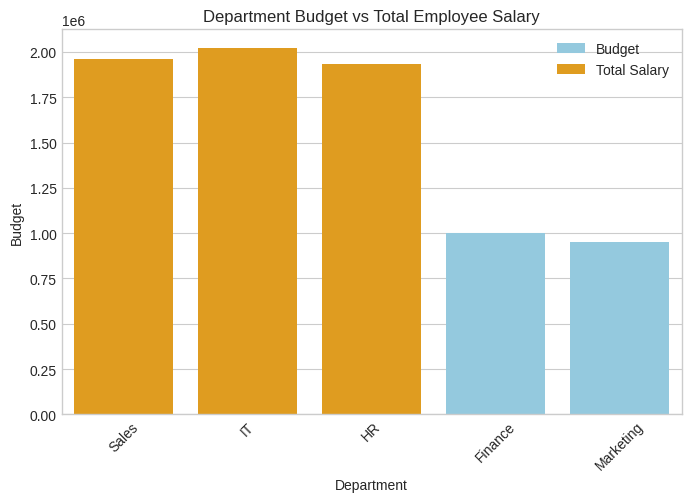

In [14]:
dept_budget = pd.DataFrame({
    'Department':['Sales','IT','HR','Finance','Marketing'],
    'Budget':[1500000,1200000,800000,1000000,950000]
})
total_salary = df.groupby('Department')['Salary'].sum().reset_index().rename(columns={'Salary':'Total_Salary'})
merged = pd.merge(dept_budget, total_salary, on='Department', how='left')

plt.figure(figsize=(8,5))
sns.barplot(x='Department', y='Budget', data=merged, color='skyblue', label='Budget')
sns.barplot(x='Department', y='Total_Salary', data=merged, color='orange', label='Total Salary')
plt.legend()
plt.title("Department Budget vs Total Employee Salary")
plt.xticks(rotation=45)
plt.show()
